In [2]:
import torch
import torchgeometry as tgm

In [55]:
def gaussian_kernel(batch_size: int, channels: int, kernel_size: int, sigmas: torch.Tensor):
    """ Returns 2D gaussian kernel of batch size with size x size dimensions and standard deviation sigma. Sigmas is a vector with a different sigma for every element in the batch. Final tensor shape is [B, C, size, size]"""
    kernels = []
    for sigma in sigmas:
        kernel = tgm.image.get_gaussian_kernel2d((kernel_size, kernel_size), (sigma, sigma))
        # normalise the kernel
        kernel = kernel / kernel.max()
        kernel = 1 - kernel
        # flatten kerenel where values are below a theshold of 0.1
        kernel = (kernel > 0.5).float()
        kernels.append(kernel)
    kernels = torch.stack(kernels)
    kernels = kernels.unsqueeze(1).repeat(1, channels, 1, 1)

    return kernels


In [56]:
def plot_diff(sigma):
    kernels = gaussian_kernel(2, 1, 111, torch.tensor([sigma, sigma+1]))
    diff = - kernels[1] + kernels[0]
    import matplotlib.pyplot as plt

    plt.imshow(diff.squeeze().numpy(), cmap='gray')
    plt.colorbar()
    plt.show()

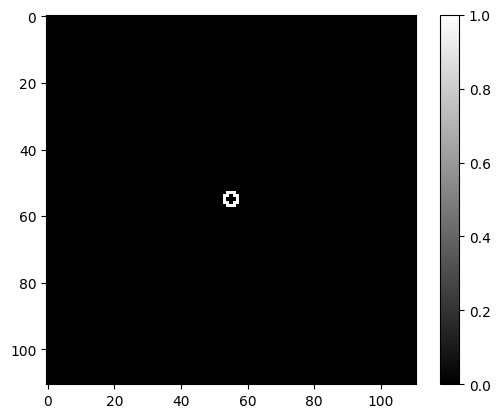

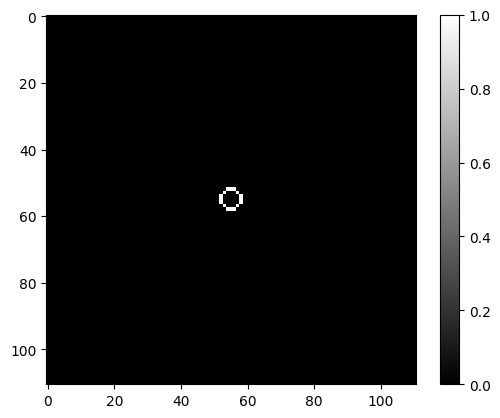

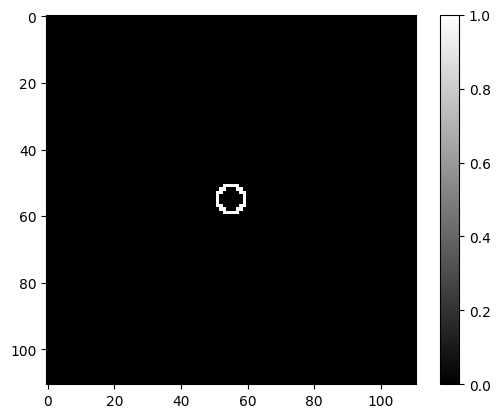

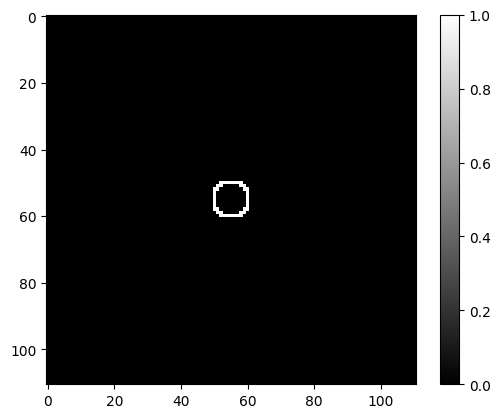

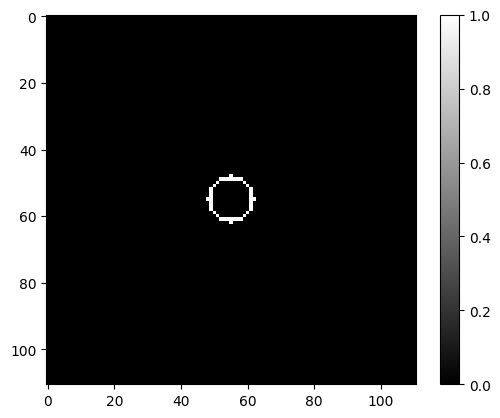

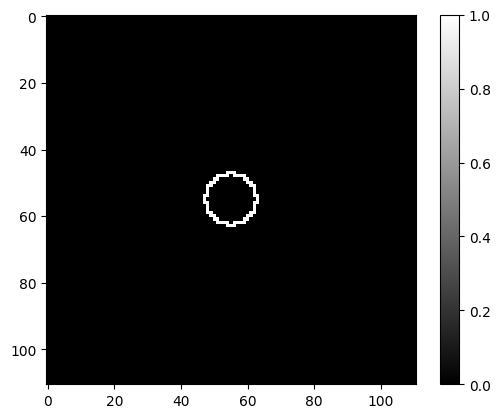

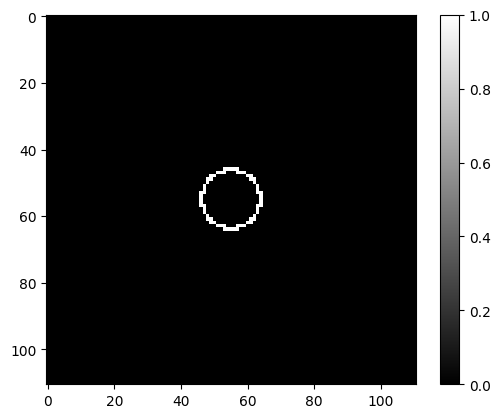

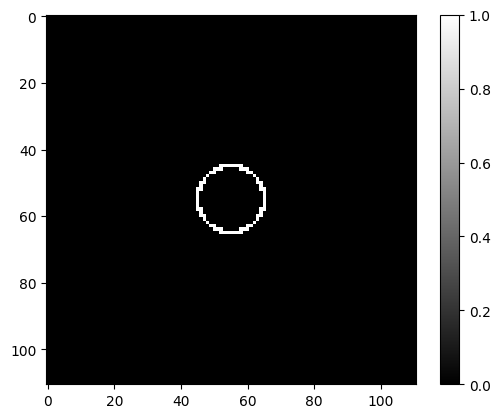

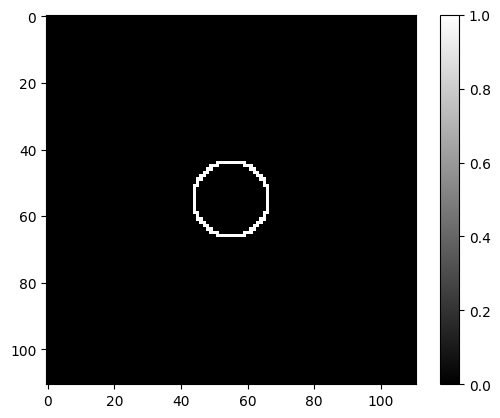

In [57]:
for i in range(1, 10):
    plot_diff(i)